# Project Overview

This project utilizes data from the Open Food Facts database to analyze and classify nutritional information through advanced data processing techniques and machine learning algorithms. The primary aim is to uncover nutritional patterns, categorize food items, and provide dietary recommendations based on user input, leveraging a large dataset of over 104,000 entries and 98 features.

**Key Steps:**

*   [Installation and Configuration](#scrollTo=j2nMj2XN-owq&line=1&uniqifier=1)
    * Install the necessary Python libraries for data handling and AWS S3 access.
    
    * Configure the AWS S3 client to read Excel files directly into Pandas DataFrames, enabling efficient data processing.

*   [Data Processing and Cleaning](#scrollTo=4jPfWfSH_1m-&line=1&uniqifier=1)
    * Define functions to ensure required columns are present and handle missing values.
    
    * Clean and standardize the data by removing duplicates and selecting relevant columns (`nutrients_to_check`).
    * Concatenate processed DataFrames into a master DataFrame, resulting in a consistent and comprehensive dataset.

*   [Clustering Analysis](#scrollTo=DpR2hIBlAGO0&line=3&uniqifier=1)
    * Remove outliers from the dataset using the Z-Score method.
    
    * Apply Principal Component Analysis (PCA) to reduce data dimensionality while preserving essential information.
    * Determine the optimal number of clusters using the elbow method.
    * Implement K-Means clustering to group nutritional data into meaningful categories and visualize the results using scatter plots.


*   [Diet Classification](#scrollTo=nEyhnzy8Caz0)
    * Define popular fad diets, such as Keto and low-carb diets, using established nutritional criteria.
    * Normalize the data using `StandardScaler`.
    * Perform clustering with 12 clusters using K-Means.
    
    * Split data into training and testing sets using `train_test_split`.
    * Train a RandomForest Classifier to classify nutritional profiles.
    * Allow users to input their dietary habits and receive recommendations on which fad diets align with their nutritional profiles.
    * Visualize diet alignment through bar charts, illustrating how well user diets match each fad diet.


# Expected Outcomes

*   **Enhanced Understanding:** Gain insights into nutritional patterns and dietary trends through effective clustering and classification.

*   **Personalized Recommendations:** Provide users with tailored dietary suggestions based on their input, supporting informed nutritional choices.

*   **Data Visualization:** Create clear and informative visualizations to facilitate the interpretation of complex data relationships.

# References and Data Sources

1. [Open Food Facts Database](https://world.openfoodfacts.org/)
2. [Pandas Documentation](https://pandas.pydata.org/docs/)
3. [Matplotlib API Documentation](https://matplotlib.org/stable/api/index.html)
4. [Seaborn Documentation](https://seaborn.pydata.org/)
5. [NumPy Documentation](https://numpy.org/doc/2.0/reference/index.html)
6. [SciPy z-score Reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)
7. [Scikit-learn Clustering Module](https://scikit-learn.org/stable/modules/clustering.html)
8. [Scikit-learn Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
9. [Scikit-learn KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
10. [Scikit-learn RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
11. [PrettyTable Google Code](http://code.google.com/p/prettytable/w/list)
12. [Nutrition.gov](https://www.nutrition.gov/)
13. [Health.gov Dietary Guidelines](https://health.gov/our-work/nutrition-physical-activity/dietary-guidelines)
14. [AZoM Article on Nutrition](https://www.azom.com/article.aspx?ArticleID=18676)
15. [LibreTexts on Modified Diets](https://med.libretexts.org/Bookshelves/Allied_Health/Foundations_for_Assisting_in_Home_Care_(McLain_O'Hara-Leslie_and_Wade)/08%3A_Food_Nutrition_and_Meal_Preparation/8.05%3A_Unit_E-_Modified_Diets/8.5.04%3A_Types_of_Modified_Diets)
16. [Wikipedia List of Diets](https://en.wikipedia.org/wiki/List_of_diets)
17. [Healthy Eating Index (HEI) Scoring](https://epi.grants.cancer.gov/hei/calculating-hei-scores.html)
18. [USDA HEI Scoring](https://www.fns.usda.gov/cnpp/how-hei-scored)
19. [NIH: Vitamins and Minerals for Older Adults](https://www.nia.nih.gov/health/vitamins-and-supplements/vitamins-and-minerals-older-adults)
20. [Harvard Health: Listing of Vitamins](https://www.health.harvard.edu/staying-healthy/listing_of_vitamins)

## Installation and Configuration

 Install the necessary Python libraries to work with AWS S3 and handle Excel files and configure the AWS S3 Client

In [ ]:
# Set up the required library
!pip install boto3 pandas openpyxl

In [ ]:
import os

# Securely enter credentials
aws_access_key = input("Enter your AWS Access Key ID: ")
aws_secret_key = input("Enter your AWS Secret Access Key: ")

# Store in environment variables
os.environ['AWS_ACCESS_KEY_ID'] = aws_access_key
os.environ['AWS_SECRET_ACCESS_KEY'] = aws_secret_key

In [ ]:
# Configure AWS Credential
import boto3

# Connect using environment variables
s3 = boto3.client(
    's3',
    aws_access_key_id=os.environ['AWS_ACCESS_KEY_ID'],
    aws_secret_access_key=os.environ['AWS_SECRET_ACCESS_KEY']
    region_name='us-east-1'
)

**Define Data Processing Functionality**

This defines a function to read Excel files from an S3 bucket into Pandas dataframes, ensures specified columns are present, and handles missing values.


In [ ]:
import requests
import pandas as pd
import io

# AWS S3 bucket & folder detail
bucket_name = 'cis545openff'
folder_name = 'open-food-fact/'

# List of .xlsx files in the folder
xlsx_files = [
    'noodles.xlsx',
    'bakery.xlsx',
    'juice.xlsx',
    'lettuce.xlsx',
    'fiber.xlsx',
    'seafood.xlsx',
    'protein.xlsx',
    'wholegrain.xlsx',
    'egg.xlsx',
    'peas.xlsx',
    'bean.xlsx',
    'dairy.xlsx',
    'hummus.xlsx',
    'meat.xlsx',
    'veggie.xlsx'
]
xlsx_files = [folder_name + file for file in xlsx_files]

# Columns to keep
columns_to_keep = [
    'code',
    'lc',
    'product_name_en',
    'quantity',
    'serving_size',
    'brands',
    'categories',
    'countries',
    'stores',
    'ingredients_text_en',
    'allergens',
    'nutrition_data_per',
    'fat_value',
    'fat_unit',
    'saturated-fat_value',
    'saturated-fat_unit',
    'carbohydrates_value',
    'carbohydrates_unit',
    'sugars_value',
    'sugars_unit',
    'fiber_value',
    'fiber_unit',
    'proteins_value',
    'proteins_unit',
    'salt_value',
    'salt_unit',
    'sodium_value',
    'sodium_unit',
    'alcohol_value',
    'alcohol_unit',
    'energy_value',
    'energy_unit',
    'energy-from-fat_value',
    'energy-from-fat_unit',
    'montanic-acid_value',
    'montanic-acid_unit',
    'monounsaturated-fat_value',
    'monounsaturated-fat_unit',
    'polyunsaturated-fat_value',
    'polyunsaturated-fat_unit',
    'omega-3-fat_value',
    'omega-3-fat_unit',
    'omega-6-fat_value',
    'omega-6-fat_unit',
    'trans-fat_value',
    'trans-fat_unit',
    'cholesterol_value',
    'cholesterol_unit',
    'added-sugars_value',
    'added-sugars_unit',
    'polyols_value',
    'polyols_unit',
    'soluble-fiber_value',
    'soluble-fiber_unit',
    'vitamin-a_value',
    'vitamin-a_unit',
    'vitamin-d_value',
    'vitamin-d_unit',
    'vitamin-c_value',
    'vitamin-c_unit',
    'vitamin-b1_value',
    'vitamin-b1_unit',
    'vitamin-b2_value',
    'vitamin-b2_unit',
    'vitamin-pp_value',
    'vitamin-pp_unit',
    'vitamin-b6_value',
    'vitamin-b6_unit',
    'vitamin-b9_value',
    'vitamin-b9_unit',
    'folates_value',
    'folates_unit',
    'vitamin-b12_value',
    'vitamin-b12_unit',
    'pantothenic-acid_value',
    'pantothenic-acid_unit',
    'potassium_value',
    'potassium_unit',
    'calcium_value',
    'calcium_unit',
    'phosphorus_value',
    'phosphorus_unit',
    'iron_value',
    'iron_unit',
    'magnesium_value',
    'magnesium_unit',
    'zinc_value',
    'zinc_unit',
    'copper_value',
    'copper_unit',
    'manganese_value',
    'manganese_unit',
    'selenium_value',
    'selenium_unit',
    'iodine_value',
    'iodine_unit',
    'phylloquinone_value',
    'phylloquinone_unit'
    ]

# Default values for 'value' and 'unit' columns
value_default = 0
unit_default = 'g'

# Read a single .xlsx file from S3 into a pandas dataframe
def read_xlsx_from_s3(bucket, key):
    response = s3.get_object(Bucket=bucket, Key=key)
    df = pd.read_excel(io.BytesIO(response['Body'].read()), engine='openpyxl')
    df = df.dropna(axis=1, how='all')

    # Add the default values in case the column doesn't exist
    for column in columns_to_keep:
        if column not in df.columns:
            if 'value' in column:
                df[column] = value_default
            elif 'unit' in column:
                df[column] = unit_default
            else:
                df[column] = None

    # Fill NaN values with default values
    for column in columns_to_keep:
        if 'value' in column:
            df[column].fillna(value_default, inplace=True)
        elif 'unit' in column:
            df[column].fillna(unit_default, inplace=True)

    df = df[columns_to_keep]
    return df


# Read all .xlsx files into separate dataframes
dataframes = {}
for file in xlsx_files:
    df_name = file.split('/')[-1].replace('.xlsx', '_df')
    dataframes[df_name] = read_xlsx_from_s3(bucket_name, file)
    print(f"DataFrame '{df_name}' has been created.")

DataFrame 'noodles_df' has been created.
DataFrame 'bakery_df' has been created.
DataFrame 'juice_df' has been created.
DataFrame 'lettuce_df' has been created.
DataFrame 'fiber_df' has been created.
DataFrame 'seafood_df' has been created.
DataFrame 'protein_df' has been created.
DataFrame 'wholegrain_df' has been created.
DataFrame 'egg_df' has been created.
DataFrame 'peas_df' has been created.
DataFrame 'bean_df' has been created.
DataFrame 'dairy_df' has been created.
DataFrame 'hummus_df' has been created.
DataFrame 'meat_df' has been created.
DataFrame 'veggie_df' has been created.


## Clean, Prepare, and Standardize DataFrames

Iterate over a list of DataFrames and remove duplicates. Ensure they only contain specified columns for this project (nutrients_to_check). Then, concatenate all DataFrames into a master DataFrame, standardizing units for nutritional values, and printing examples for verification.

In [ ]:
# List of DataFrame names
df_names = [
    'noodles_df', 'bakery_df', 'juice_df', 'lettuce_df', 'fiber_df',
    'seafood_df', 'protein_df', 'wholegrain_df', 'egg_df', 'peas_df',
    'bean_df', 'dairy_df', 'hummus_df', 'meat_df', 'veggie_df'
]

# Clean each DataFrame
for name in df_names:
    df = dataframes.get(name)
    if df is not None:
        df = df.drop_duplicates()
        df = df[columns_to_keep]
        dataframes[name] = df  # Update the original DataFrame
    else:
        print(f"DataFrame '{name}' does not exist in the dataframes dictionary.")

In [ ]:
# Prepare a master DataFrame for analysis by concatenating dataframes and removing NaN in nutrition-related columns
master_df = pd.concat([dataframes[name] for name in df_names if name in dataframes], ignore_index=True)

# Display the shape of the master DataFrame
print("Master DataFrame shape:", master_df.shape)

Master DataFrame shape: (104033, 98)


In [ ]:
# Define categories for nutrients
categories = {
    "Macronutrients": [
        'proteins_value', 'fat_value', 'saturated-fat_value', 'monounsaturated-fat_value',
        'polyunsaturated-fat_value', 'omega-3-fat_value', 'omega-6-fat_value', 'trans-fat_value',
        'carbohydrates_value', 'polyols_value', 'fiber_value'
    ],
    "High Energy and Sugars": [
        'energy_value', 'energy-from-fat_value', 'sugars_value', 'added-sugars_value'
    ],
    "Vitamins": [
        'vitamin-a_value', 'vitamin-d_value', 'vitamin-c_value', 'vitamin-b1_value',
        'vitamin-b2_value', 'vitamin-pp_value', 'vitamin-b6_value', 'vitamin-b9_value',
        'vitamin-b12_value', 'pantothenic-acid_value'
    ],
    "Sodium": [
        'sodium_value'
    ]
}

In [ ]:
# Define units for each nutritional category
nutrient_units = {
    'proteins_value': 'g', 'fat_value': 'g', 'saturated-fat_value': 'g', 'monounsaturated-fat_value': 'g',
    'polyunsaturated-fat_value': 'g', 'omega-3-fat_value': 'g', 'omega-6-fat_value': 'g', 'trans-fat_value': 'g',
    'carbohydrates_value': 'g', 'sugars_value': 'g', 'added-sugars_value': 'g', 'polyols_value': 'g', 'fiber_value': 'g',
    'energy_value': 'kcal', 'energy-from-fat_value': 'kcal',
    'vitamin-a_value': 'µg', 'vitamin-d_value': 'µg', 'vitamin-c_value': 'mg', 'vitamin-b1_value': 'mg',
    'vitamin-b2_value': 'mg', 'vitamin-pp_value': 'mg', 'vitamin-b6_value': 'mg', 'vitamin-b9_value': 'mg',
    'vitamin-b12_value': 'µg', 'pantothenic-acid_value': 'mg', 'sodium_value': 'mg'
}

In [ ]:
def convert_value(value, from_unit, to_unit):
    """
    Convert a nutrient value from one unit to another using predefined conversion factors.

    Args:
        value (float): The nutrient value to convert.
        from_unit (str): The current unit of the nutrient value.
        to_unit (str): The target unit to convert the nutrient value to.

    Returns:
        float: The converted nutrient value.
    """
    # Define conversion factors between different units
    conversion_factors = {
        ('g', 'mg'): 1000,     # Grams to milligrams
        ('mg', 'g'): 1 / 1000, # Milligrams to grams
        ('µg', 'mg'): 1 / 1000,# Micrograms to milligrams
        ('mg', 'µg'): 1000,    # Milligrams to micrograms
        ('g', 'µg'): 1e6,      # Grams to micrograms
        ('µg', 'g'): 1 / 1e6,  # Micrograms to grams
        ('kj', 'kcal'): 1 / 4.184, # Kilojoules to kilocalories
    }
    # Perform the conversion using the appropriate factor
    return value * conversion_factors.get((from_unit, to_unit), 1)

In [ ]:
def standardize_nutrient_units(df):
    """
    Standardize the units of nutrient values in a DataFrame to a consistent format.

    Args:
        df (DataFrame): The DataFrame containing nutrient values and their units.

    Returns:
        DataFrame: The updated DataFrame with standardized nutrient units.
    """
    for nutrient, target_unit in nutrient_units.items():
        unit_column = nutrient.replace('_value', '_unit')  # Determine the corresponding unit column
        if unit_column in df.columns:
            df[nutrient] = df.apply(
                lambda row: convert_value(row[nutrient], row[unit_column], target_unit), axis=1
            )
            df[unit_column] = target_unit  # Update the unit column to reflect the conversion
    return df

In [ ]:
# Apply the conversions to the DataFrame
master_df = standardize_nutrient_units(master_df)

In [ ]:
# Verify the conversion with additional checks
for category, nutrients in categories.items():
    for nutrient in nutrients:
        unit_column = nutrient.replace('_value', '_unit')
        assert master_df[unit_column].unique() == [nutrient_units[nutrient]], f"Unit conversion error for {nutrient}"
        print(f"{nutrient}: conversion to {nutrient_units[nutrient]} successful.")

proteins_value: conversion to g successful.
fat_value: conversion to g successful.
saturated-fat_value: conversion to g successful.
monounsaturated-fat_value: conversion to g successful.
polyunsaturated-fat_value: conversion to g successful.
omega-3-fat_value: conversion to g successful.
omega-6-fat_value: conversion to g successful.
trans-fat_value: conversion to g successful.
carbohydrates_value: conversion to g successful.
polyols_value: conversion to g successful.
fiber_value: conversion to g successful.
energy_value: conversion to kcal successful.
energy-from-fat_value: conversion to kcal successful.
sugars_value: conversion to g successful.
added-sugars_value: conversion to g successful.
vitamin-a_value: conversion to µg successful.
vitamin-d_value: conversion to µg successful.
vitamin-c_value: conversion to mg successful.
vitamin-b1_value: conversion to mg successful.
vitamin-b2_value: conversion to mg successful.
vitamin-pp_value: conversion to mg successful.
vitamin-b6_value: 

## Clustering Analysis

Implement clustering analysis using K-Means to categorize nutritional data into groups. Include functions to determine optimal clusters using the elbow method, remove outliers using the Z-score method, and perform clustering on specific nutritional categories. Finally, visualize the clustering results using scatter plots.

In [ ]:
# 1. Import and Setup

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import zscore
from prettytable import PrettyTable

In [ ]:
# 2. Clustering Functions

def optimal_clusters(data):
    """
    Determine the optimal number of clusters for KMeans using the elbow method.

    Args:
        data (DataFrame): Scaled data to be clustered.
    """
    sse = []  # List to store the sum of squared errors for each number of clusters
    k_values = range(1, 11)  # Range of possible cluster numbers to test
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with k clusters
        kmeans.fit(data)  # Fit KMeans to the data
        sse.append(kmeans.inertia_)  # Append the sum of squared errors to the list

    # Plot the elbow graph
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sse, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [ ]:
def remove_outliers(df, features, threshold=3):
    """
    Remove outliers from the DataFrame using Z-Score method.

    Args:
        df (DataFrame): Original data.
        features (list): List of feature names to check for outliers.
        threshold (float): Z-Score threshold to identify outliers.
    Returns:
        DataFrame: Data without outliers.
    """
    df_zscore = df[features].apply(zscore)  # Calculate the Z-Score for each feature
    df_outliers_removed = df[(np.abs(df_zscore) < threshold).all(axis=1)]  # Filter out outliers
    return df_outliers_removed

In [ ]:
def perform_clustering(category_name, features, n_clusters=4):
    """
    Perform clustering on the specified nutritional category.

    Args:
        category_name (str): Name of the category.
        features (list): List of features related to the category.
        n_clusters (int): Number of clusters for KMeans.
    Returns:
        DataFrame: Clustered data with assigned cluster labels.
        KMeans: Fitted KMeans model.
    """
    # Select data for the category, ensuring that only relevant columns are used
    category_data = master_df[features + ['product_name_en']].dropna().copy()
    category_data = remove_outliers(category_data, features)  # Remove outliers
    scaler = StandardScaler()  # Initialize the scaler
    category_data_scaled = scaler.fit_transform(category_data[features])  # Scale the data

    if category_data_scaled.shape[1] > 1:
        pca = PCA(n_components=2)  # Perform PCA to reduce dimensionality to 2 components
        principal_components = pca.fit_transform(category_data_scaled)
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    else:
        pca_df = pd.DataFrame(data=category_data_scaled, columns=['Feature1'])  # Use scaled data directly if only one feature

    optimal_clusters(pca_df)  # Determine the optimal number of clusters

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize KMeans with n_clusters
    clusters = kmeans.fit_predict(pca_df)  # Perform clustering
    pca_df['Cluster'] = clusters  # Add cluster labels to the PCA DataFrame
    category_data['Cluster'] = clusters  # Add cluster labels to the original data

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    if category_data_scaled.shape[1] > 1:
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
    else:
        sns.scatterplot(data=pca_df, x='Feature1', y='Feature1', hue='Cluster', palette='viridis')
    plt.title(f'Clusters for {category_name}')
    plt.show()

    return category_data, kmeans  # Return the clustered data and the KMeans model

**Calculate Health Scores and Generate Health Messages**

Calculate health scores for clustered nutritional data, then rank clusters by healthiness and generate health messages for food items. Include functions to rank clusters by healthiness, retrieve food item details, and create a health message based on nutritional content and cluster rankings. Finally, run the full analysis for all nutritional categories, display health rankings, and provides an example health message for a specific food item.

In [ ]:
# 3. Health Score Calculation

def rank_clusters_by_healthiness(df, categories):
    """
    Rank clusters by healthiness for each nutritional category.

    Args:
        df (DataFrame): Clustered data.
        categories (dict): Dictionary of categories and their features.
    Returns:
        dict: Health scores for each category.
    """
    cluster_health_scores = {}  # Dictionary to store health scores for each category

    for category, features in categories.items():
        # Calculate the mean values for each feature in the category, grouped by cluster
        cluster_means = df[df['Category'] == category].groupby('Cluster')[features].mean()

        if category == "Macronutrients":
            # High protein, low fats, and sugars are considered healthy
            health_score = cluster_means['proteins_value'] - (cluster_means[['fat_value']].mean(axis=1))

        elif category == "High Energy and Sugars":
            # Moderate energy and low sugars are considered healthy
            energy_deviation = -np.abs(cluster_means['energy_value'] - cluster_means['energy_value'].mean())
            health_score = energy_deviation - cluster_means['sugars_value']

        elif category == "Vitamins":
            # Normalize each vitamin value to a common scale
            normalized_vitamins = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
            # Aggregate the normalized values to get an overall health score for vitamins
            health_score = normalized_vitamins.sum(axis=1)

        elif category == "Sodium":
            # Low to moderate sodium is considered healthy
            health_score = -cluster_means['sodium_value']

        # Normalize health scores to a scale of 0 to 1 for better interpretation
        health_score_normalized = (health_score - health_score.min()) / (health_score.max() - health_score.min())
        # Store the normalized health scores, sorted in descending order
        cluster_health_scores[category] = health_score_normalized.sort_values(ascending=False)

    return cluster_health_scores  # Return the health scores for each category


In [ ]:
# 4. Health Message Function

# Define the weights for each category
category_weights = {
    "Macronutrients": 0.4,  # Higher weight for macronutrients
    "High Energy and Sugars": 0.2,  # Moderate weight for high energy and sugars
    "Vitamins": 0.3,  # Higher weight for vitamins
    "Sodium": 0.1  # Lower weight for sodium
}

In [ ]:
def get_food_details(food_name, df):
    """
    Retrieve food item details and cluster information.

    Args:
        food_name (str): Name of the food item.
        df (DataFrame): Clustered data.
    Returns:
        tuple: Category, cluster, and features of the food item.
    """
    # Find the food item in the DataFrame by matching the product name (case insensitive)
    food_item = df[df['product_name_en'].str.lower() == food_name.lower()]
    if not food_item.empty:
        # Extract category, cluster, and features for the food item
        category = food_item.iloc[0]['Category']
        cluster = food_item.iloc[0]['Cluster']
        features = food_item.iloc[0][categories[category]].to_dict()
        return category, cluster, features
    else:
        return None

In [ ]:
def get_food_health_message(food_name, df, cluster_health_scores):
    """
    Retrieve food item details, cluster information, and generate a health message.

    Args:
        food_name (str): Name of the food item.
        df (DataFrame): Clustered data.
        cluster_health_scores (dict): Health scores for each category.
    Returns:
        str: Health message for the food item.
    """
    food_details = get_food_details(food_name, df)
    if food_details:
        overall_health_score = 0
        total_weight = 0
        category_messages = []
        features = {}

        for category in categories:
            if category in cluster_health_scores:
                # Find the cluster for the food item in the current category
                cluster = df[(df['product_name_en'].str.lower() == food_name.lower()) & (df['Category'] == category)]['Cluster'].values[0]
                healthiness_rank = cluster_health_scores[category].rank(ascending=False)[cluster]
                num_clusters = len(cluster_health_scores[category])

                # Determine health message based on the healthiness rank
                if healthiness_rank == 1:
                    health_message = "is ranked the healthiest"
                elif healthiness_rank == num_clusters:
                    health_message = "is ranked the least healthy"
                elif healthiness_rank <= num_clusters // 2:
                    if healthiness_rank == 2:
                        health_message = f"is ranked {int(healthiness_rank)} out of {num_clusters} in healthiness, which is moderately healthy, but could be unhealthy in excess"
                    else:
                        health_message = f"is ranked {int(healthiness_rank)} out of {num_clusters} in healthiness, which is relatively healthy"
                else:
                    if healthiness_rank == num_clusters - 1:
                        health_message = f"is ranked {int(healthiness_rank)} out of {num_clusters} in healthiness, which is moderately unhealthy, but could be healthy in moderation"
                    else:
                        health_message = f"is ranked {int(healthiness_rank)} out of {num_clusters} in healthiness, which is relatively unhealthy"

                # Create a message for the current category
                category_message = (
                    f"-------------------------------------\n"
                    f"Category: {category}\n"
                    f"Cluster: {cluster}\n"
                    f"Health Rank: {healthiness_rank} ({health_message})\n"
                )
                category_messages.append(category_message)

                # Update the overall health score with the weighted rank
                overall_health_score += healthiness_rank * category_weights[category]
                total_weight += category_weights[category]

                # Add features for each category to the features dictionary
                features.update(df[(df['product_name_en'].str.lower() == food_name.lower()) & (df['Category'] == category)][categories[category]].iloc[0].to_dict())

        # Calculate the overall health score by averaging the scores from all categories
        overall_health_score /= total_weight

        # Determine the overall health message based on the overall health score
        overall_message = ""
        if overall_health_score == 1:
            overall_message = "achieves the pinnacle of healthiness overall"
        elif overall_health_score == num_clusters:
            overall_message = "falls to the bottom as the least healthy overall"
        elif overall_health_score <= num_clusters // 2:
            overall_message = f"has an overall health score of {overall_health_score:.2f} out of {num_clusters}, standing out as moderately healthy, but should be consumed with awareness"
        else:
            overall_message = f"has an overall health score of {overall_health_score:.2f} out of {num_clusters}, leaning towards the unhealthy side, but could be balanced in moderation"

        # Build the final message with overall and category-specific health information
        message = (
            "#####################################\n"
            f"Food Item: {food_name}\n"
            f"Overall Health Score: {overall_health_score:.2f} ({overall_message})\n"
            "#####################################\n\n"
            "Health Scores by Category:\n"
        )

        # Add the category-specific messages to the final message
        for category_message in category_messages:
            message += category_message

        # Add the nutritional features table to the final message
        message += "\nNutritional Features:\n"
        seen_features = set()
        for category, feature_category in categories.items():
            table = PrettyTable()
            table.field_names = ["Nutritional Feature", "Value (Unit)"]
            for feature in feature_category:
                if feature in features and feature not in seen_features:
                    # Add the unit to the feature's value for display
                    unit_column = feature.replace('_value', '_unit')
                    unit = master_df.loc[master_df['product_name_en'].str.lower() == food_name.lower(), unit_column].iloc[0]
                    table.add_row([feature.replace('_value', '').replace('-', ' ').title(), f"{features[feature]} {unit}"])
                    seen_features.add(feature)
            message += f"\n\n  {category}:\n"
            message += table.get_string()

        return message  # Return the final health message
    else:
        return f"Food Item: {food_name} not found in the dataset."  # Return a message if the food item is not found

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

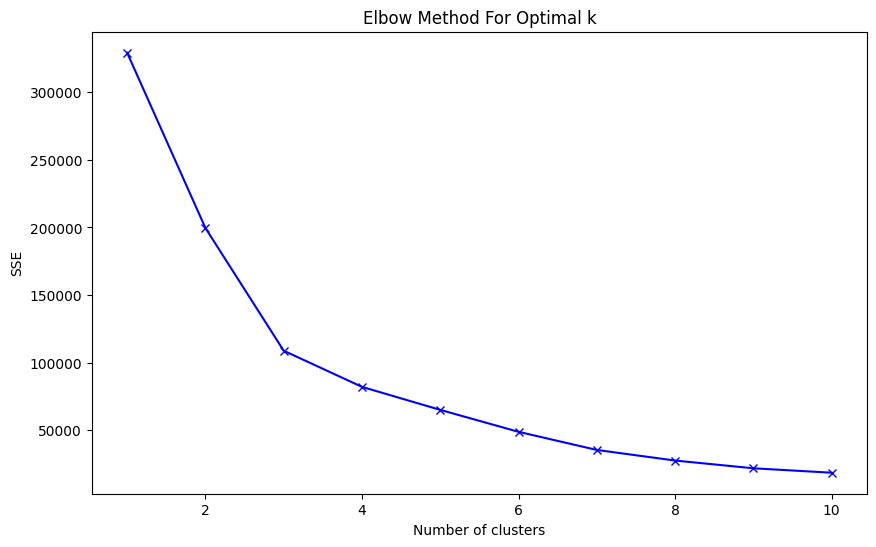

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


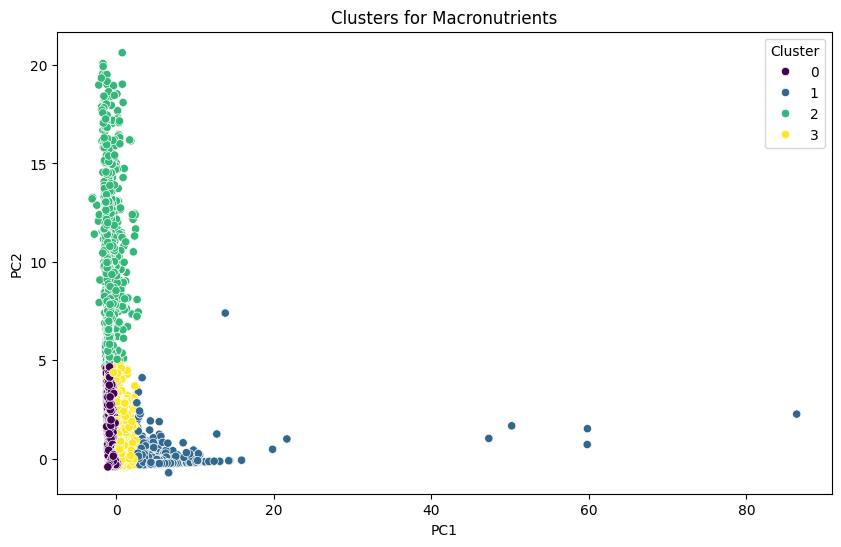

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

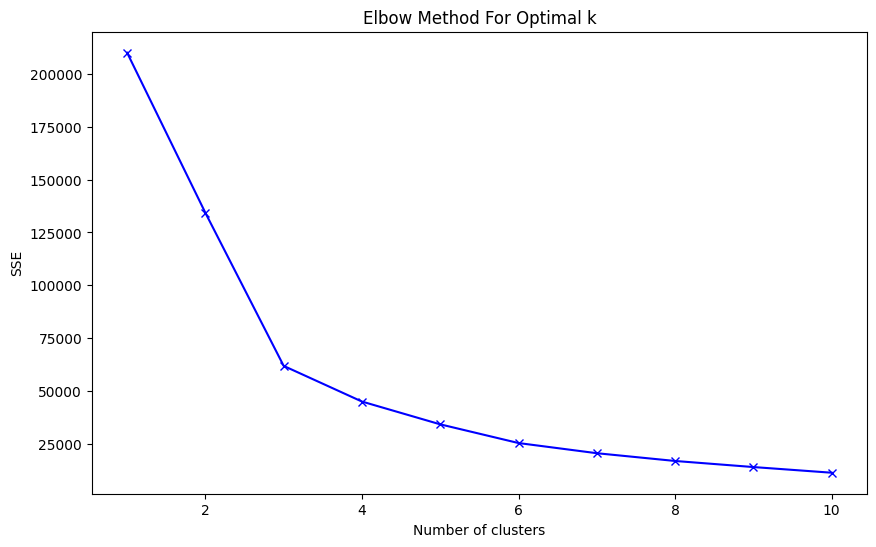

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


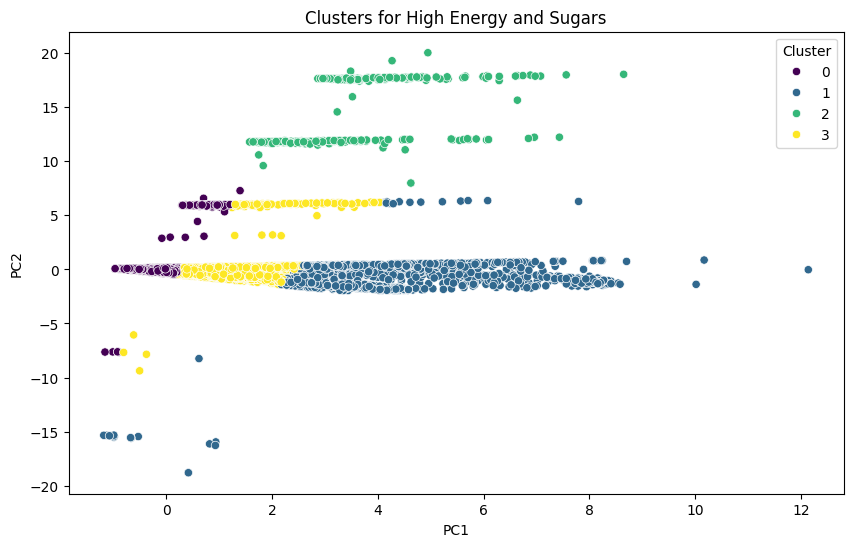

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

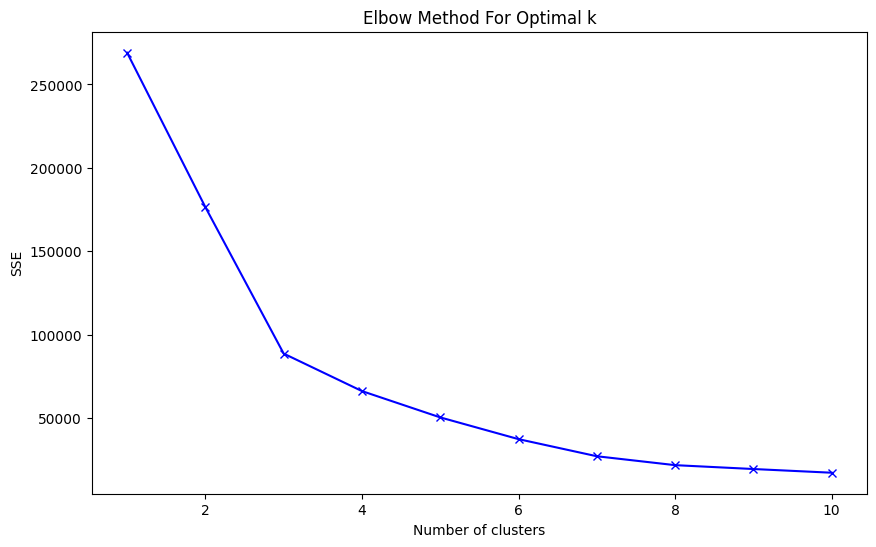

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


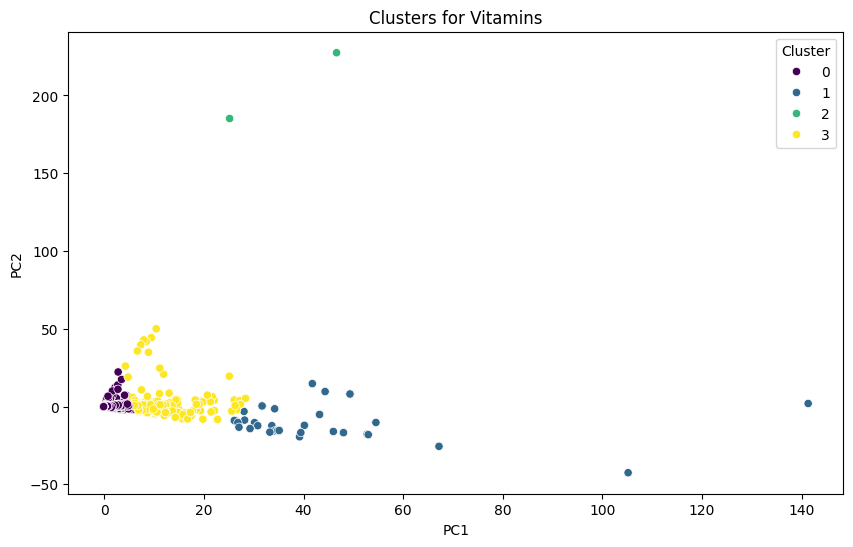

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

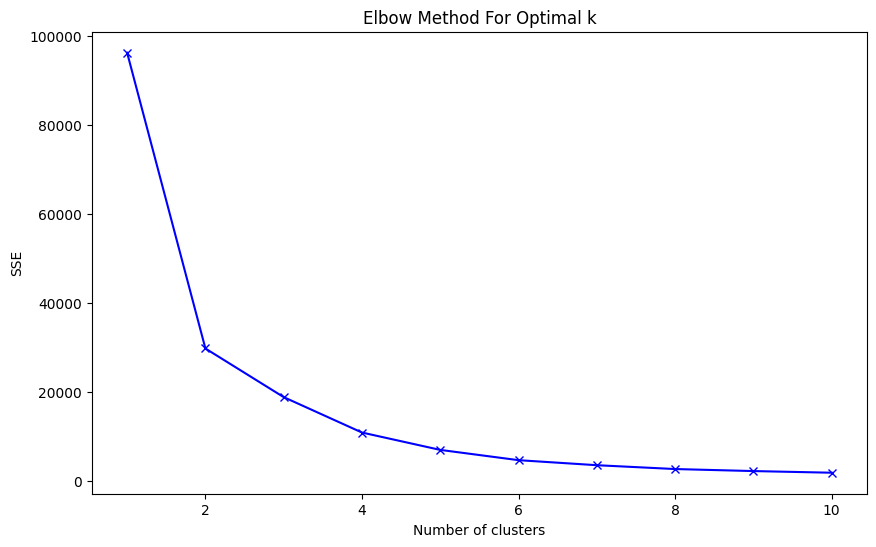

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


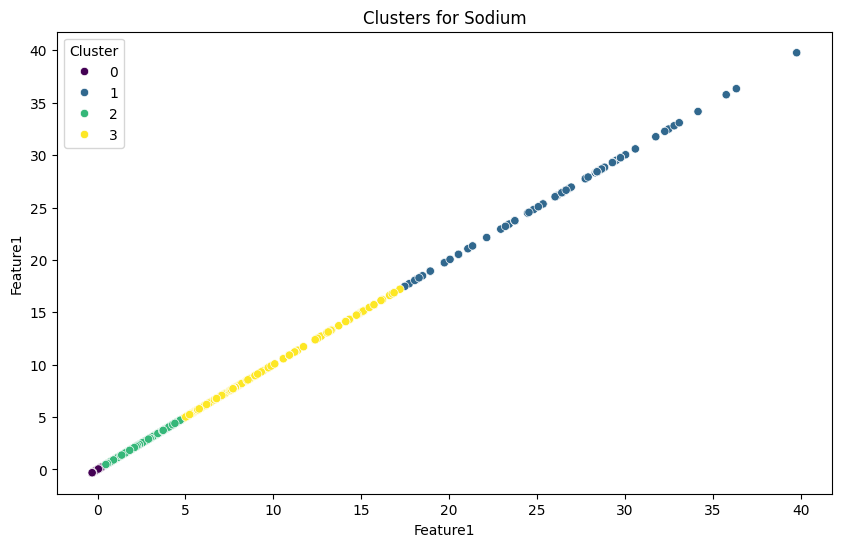

Health ranking for Macronutrients category:
Cluster
2    1.000000
3    0.933625
0    0.923451
1    0.000000
dtype: float64


Health ranking for High Energy and Sugars category:
Cluster
2    1.000000
3    0.834912
0    0.220008
1    0.000000
dtype: float64


Health ranking for Vitamins category:
Cluster
1    1.000000
3    0.774592
2    0.589849
0    0.000000
dtype: float64


Health ranking for Sodium category:
Cluster
0    1.000000
2    0.966135
3    0.651572
1    0.000000
Name: sodium_value, dtype: float64




In [ ]:
# 5. Running the Cluster

# Create an empty DataFrame to store cluster labels
clustered_data = pd.DataFrame()
kmeans_models = {}

# Apply clustering to each category and collect the results
for category, features in categories.items():
    category_clustered_data, kmeans = perform_clustering(category, features, n_clusters=4)
    category_clustered_data['Category'] = category
    clustered_data = pd.concat([clustered_data, category_clustered_data])
    kmeans_models[category] = kmeans

# Rank clusters by healthiness for each category
cluster_health_scores = rank_clusters_by_healthiness(clustered_data, categories)

# Display cluster health rankings
for category, scores in cluster_health_scores.items():
    print(f"Health ranking for {category} category:")
    print(scores)
    print("\n")

**Example: Evaluating the Healthiness of "Apple Noodle Kugel"**

This example demonstrates how to evaluate the healthiness of a specific food item, "Apple Noodle Kugel," by analyzing its clustering into a predefined health score.

In [ ]:
# Define the food item name to evaluate
food_name = "Apple Noodle Kugel"

# Print the healthiness message for the specified food item
# This function uses the clustered data and cluster health scores to determine the health rating
print(get_food_health_message(food_name, clustered_data, cluster_health_scores))

#####################################
Food Item: Apple Noodle Kugel
Overall Health Score: 2.90 (has an overall health score of 2.90 out of 4, leaning towards the unhealthy side, but could be balanced in moderation)
#####################################

Health Scores by Category:
-------------------------------------
Category: Macronutrients
Cluster: 0
Health Rank: 3.0 (is ranked 3 out of 4 in healthiness, which is moderately unhealthy, but could be healthy in moderation)
-------------------------------------
Category: High Energy and Sugars
Cluster: 3
Health Rank: 2.0 (is ranked 2 out of 4 in healthiness, which is moderately healthy, but could be unhealthy in excess)
-------------------------------------
Category: Vitamins
Cluster: 0
Health Rank: 4.0 (is ranked the least healthy)
-------------------------------------
Category: Sodium
Cluster: 0
Health Rank: 1.0 (is ranked the healthiest)

Nutritional Features:


  Macronutrients:
+---------------------+--------------+
| Nutritional Fe

**Analyze Goals vs Achieved Values**

Set up a dictionary called nutritional_goals to store average values for various nutrients based on recommendations. Filter the DataFrame for a list of specific food items and calculate the total acquired values for these nutrients. Then, provide a comparison between these obtained values and the set average goals. Visualize these results with a few bar charts a to show the nutrient goals and acquired values.

In [ ]:
# 6. Create Bar Charts for Visualization

# Define average nutritional goals with units for comparison
average_goals = {
    'proteins_value': 50,  # grams (g)
    'fat_value': 70,  # grams (g)
    'saturated-fat_value': 20,  # grams (g)
    'monounsaturated-fat_value': 20,  # grams (g)
    'polyunsaturated-fat_value': 10,  # grams (g)
    'omega-3-fat_value': 1.6,  # grams (g)
    'omega-6-fat_value': 17,  # grams (g)
    'trans-fat_value': 2,  # grams (g)
    'carbohydrates_value': 300,  # grams (g)
    'sugars_value': 50,  # grams (g)
    'added-sugars_value': 25,  # grams (g)
    'polyols_value': 10,  # grams (g)
    'fiber_value': 30,  # grams (g)
    'energy_value': 2000,  # kilocalories (kcal)
    'energy-from-fat_value': 400,  # kilocalories (kcal)
    'vitamin-a_value': 900,  # micrograms (µg)
    'vitamin-d_value': 20,  # micrograms (µg)
    'vitamin-c_value': 90,  # milligrams (mg)
    'vitamin-b1_value': 1.2,  # milligrams (mg)
    'vitamin-b2_value': 1.3,  # milligrams (mg)
    'vitamin-pp_value': 16,  # milligrams (mg)
    'vitamin-b6_value': 1.7,  # milligrams (mg)
    'vitamin-b9_value': 400,  # micrograms (µg)
    'vitamin-b12_value': 2.4,  # micrograms (µg)
    'pantothenic-acid_value': 5,  # milligrams (mg)
    'sodium_value': 2300  # milligrams (mg)
}

In [ ]:
# Define food items
food_items = ["Apple", "Pineapple Chunks", "Beef", "Chicken", "Olive Oil"]

In [ ]:
def aggregate_nutritional_info(food_items, df):
    """
    Aggregate nutritional information for selected food items.

    Args:
        food_items (list of str): Names of the food items to analyze.
        df (DataFrame): DataFrame containing nutritional information.
    Returns:
        dict: Aggregated nutritional values for each feature.
    """
    selected_foods = df[df['product_name_en'].str.lower().isin([food.lower() for food in food_items])]

    # Initialize a dictionary to hold the sum of nutritional values for each feature
    nutrition_totals = {feature: 0 for feature in average_goals.keys()}

    # Sum the nutritional values for each feature across all selected food items
    for feature in nutrition_totals.keys():
        nutrition_totals[feature] = selected_foods[feature].fillna(0).sum()

    return nutrition_totals

In [ ]:
def calculate_category_totals(nutrition_totals, average_goals):
    """
    Calculate totals by category for the stacked bar chart.

    Args:
        nutrition_totals (dict): Aggregated nutritional values for each feature.
        average_goals (dict): Dietary goals for each nutritional feature.
    Returns:
        tuple: Category totals for goals and acquired nutrition.
    """
    category_totals_goals = {}
    category_totals_acquired = {}
    for category, nutrients in categories.items():
        total_goal = sum(average_goals.get(nutrient, 0) for nutrient in nutrients)
        total_acquired = sum(nutrition_totals.get(nutrient, 0) for nutrient in nutrients)
        category_totals_goals[category] = total_goal
        category_totals_acquired[category] = total_acquired
    return category_totals_goals, category_totals_acquired

In [ ]:
def create_stacked_bar_charts_by_category(category_totals_goals, category_totals_acquired, categories, nutrient_units):
    """
    Create separate stacked bar charts for each nutritional category.

    Args:
        category_totals_goals (dict): Totals for dietary goals by category.
        category_totals_acquired (dict): Totals for acquired nutrition by category.
        categories (dict): Nutritional categories with their respective nutrients.
        nutrient_units (dict): Units of measurement for each nutritional feature.
    """
    width = 0.35  # Width of the bars in the bar chart

    # Loop through each category to create a separate bar chart
    for category, nutrients in categories.items():
        # Determine the unit to display on the y-axis based on the nutrients in the category
        unique_units = set(nutrient_units[nutrient] for nutrient in nutrients)
        unit_label = ', '.join(unique_units)  # Combine units if there are multiple, though ideally there should be one

        # Prepare data for the bar chart
        goals_data = [category_totals_goals[category]]
        acquired_data = [category_totals_acquired[category]]
        labels = [category]

        # Create a subplot for each category
        fig, ax = plt.subplots(figsize=(6, 4))  # Smaller figure size for individual category charts
        x = np.arange(len(labels))

        # Create the bars for goals and acquired values
        rects1 = ax.bar(x - width/2, goals_data, width, label='Goals', color='navy')
        rects2 = ax.bar(x + width/2, acquired_data, width, label='Acquired', color='orange')

        # Set labels and titles based on the category and units
        ax.set_ylabel(f'Values ({unit_label})')
        ax.set_title(f'Nutritional Goals vs Acquired Values: {category}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()

        plt.tight_layout()
        plt.show()

In [ ]:
def create_clustered_bar_charts_by_category(nutrition_totals, average_goals, categories, units):
    """
    Create clustered bar charts for specific nutritional categories.

    Args:
        nutrition_totals (dict): Aggregated nutritional values for each feature.
        average_goals (dict): Dietary goals for each nutritional feature.
        categories (dict): Nutritional categories with their respective nutrients.
        units (dict): Units of measurement for each nutritional feature.
    """
    # Group nutrients by their units
    unit_groups = {}
    for nutrient, unit in units.items():
        if unit not in unit_groups:
            unit_groups[unit] = []
        unit_groups[unit].append(nutrient)

    # Iterate over each unit group and create a separate bar chart
    for unit, nutrients in unit_groups.items():
        fig_width = max(10, len(nutrients) * 1.5)
        fig, ax = plt.subplots(figsize=(fig_width, 6))

        index = np.arange(len(nutrients))
        bar_width = 0.35

        # Prepare data for goals and acquired values
        goals_data = [average_goals.get(nutrient, 0) for nutrient in nutrients]
        acquired_data = [nutrition_totals.get(nutrient, 0) for nutrient in nutrients]

        # Plot bars for goals and acquired values
        rects1 = ax.bar(index - bar_width/2, goals_data, bar_width, label='Goal', color='navy')
        rects2 = ax.bar(index + bar_width/2, acquired_data, bar_width, label='Acquired', color='orange')

        # Configure chart with titles and labels
        ax.set_ylabel(f'Values ({unit})')
        ax.set_title(f'Nutritional Goals vs Acquired Values for {unit}')
        ax.set_xticks(index)
        ax.set_xticklabels([nutrient.replace('_value', '').replace('_', ' ').title() for nutrient in nutrients], rotation=45)
        ax.legend()

        # Add value labels to bars
        add_value_labels(ax, rects1)
        add_value_labels(ax, rects2)

        # Adjust y-axis limits based on data
        max_value = max(max(goals_data), max(acquired_data))
        ax.set_ylim(0, max_value + 0.1 * max_value)

        plt.tight_layout()
        plt.show()


In [ ]:
def add_value_labels(ax, rects):
    """
    Add value labels on bars in a bar chart.

    Args:
        ax (matplotlib.axes.Axes): Axes object to annotate.
        rects (list of matplotlib.patches.Rectangle): Bars to annotate.
    """
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

**Example: Visualizing Nutritional Contributions of Selected Foods**

This example demonstrates how to aggregate nutritional information for a list of selected food items and compare it to predefined dietary goals. The resulting analysis is visualized through stacked and clustered bar charts, highlighting how each food item contributes to meeting or exceeding nutritional targets.

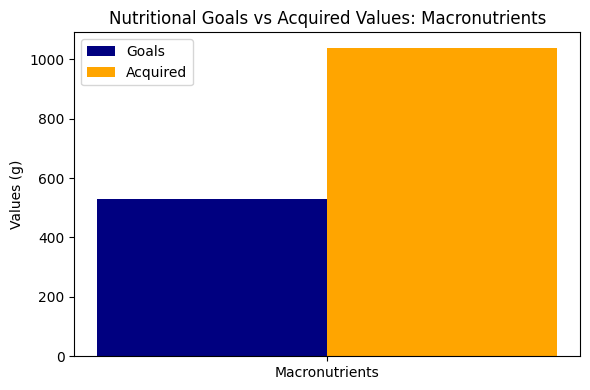

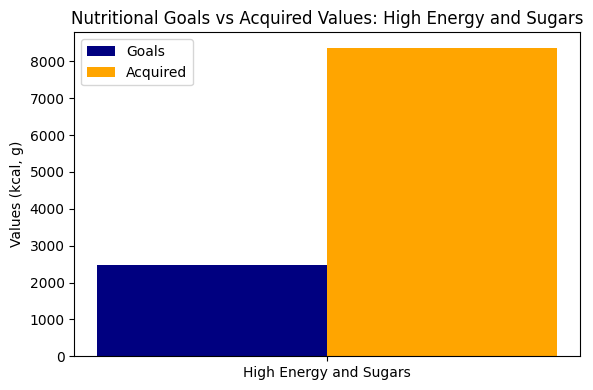

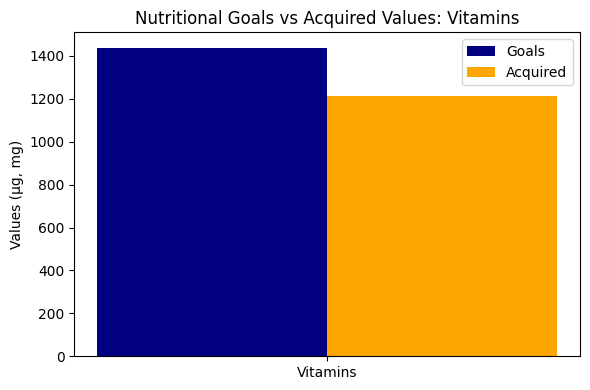

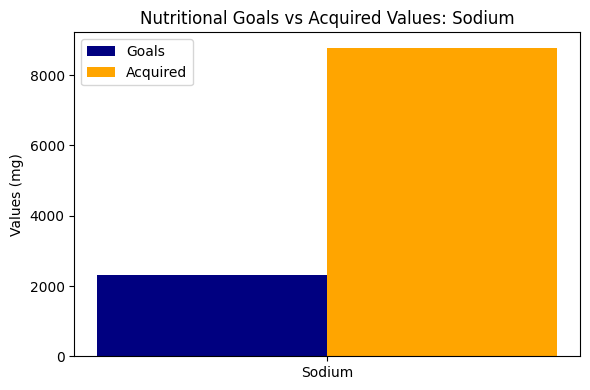

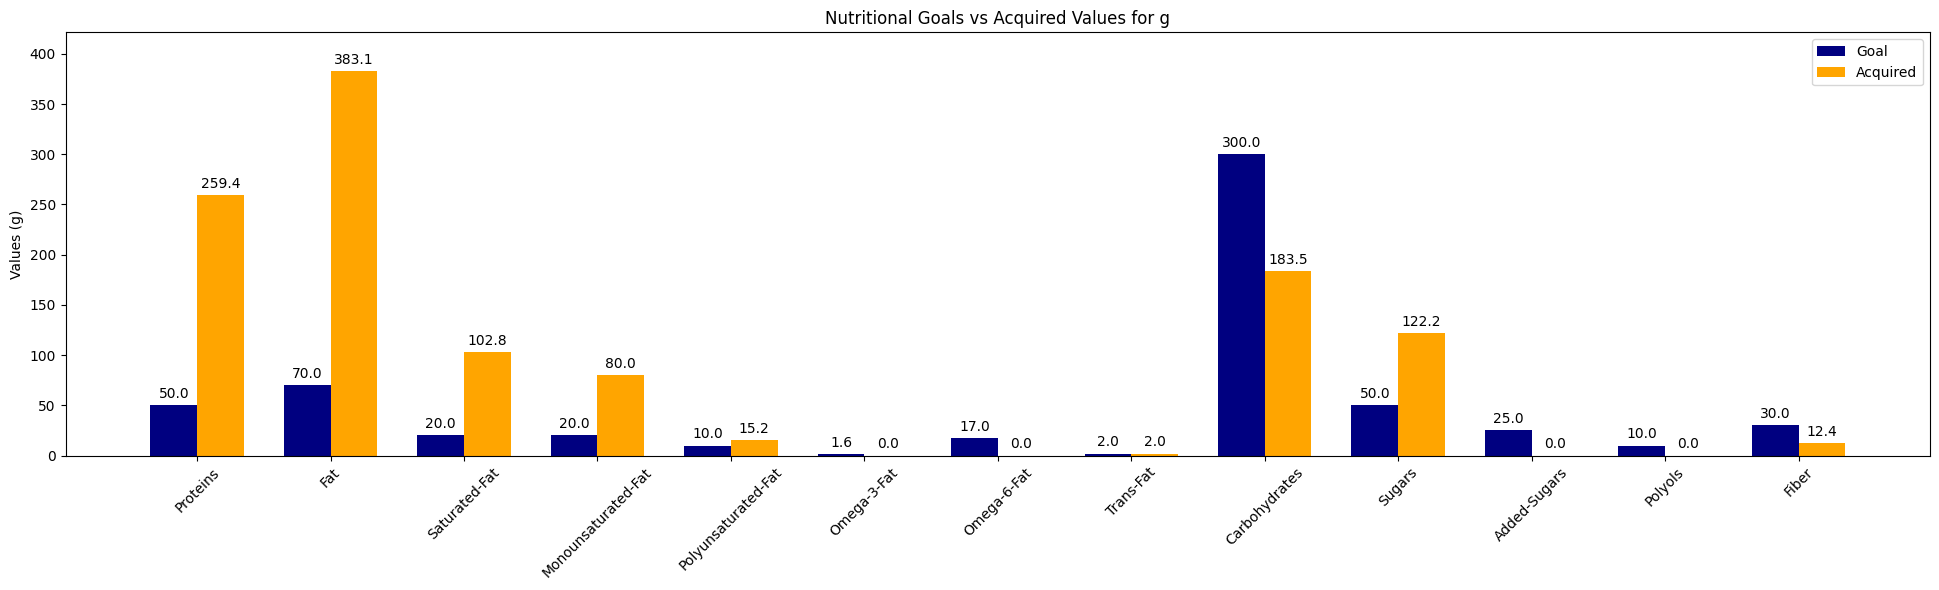

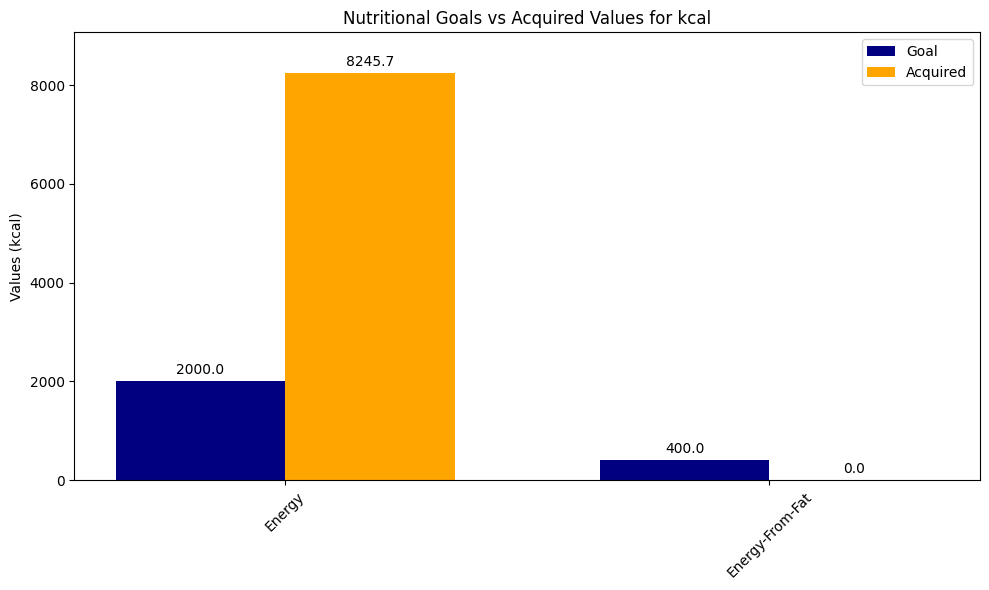

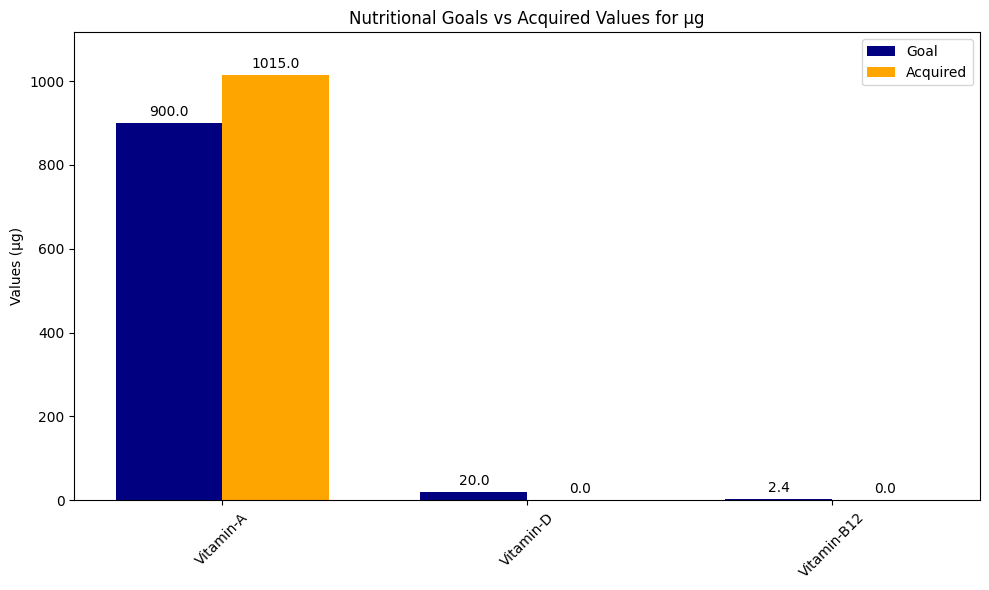

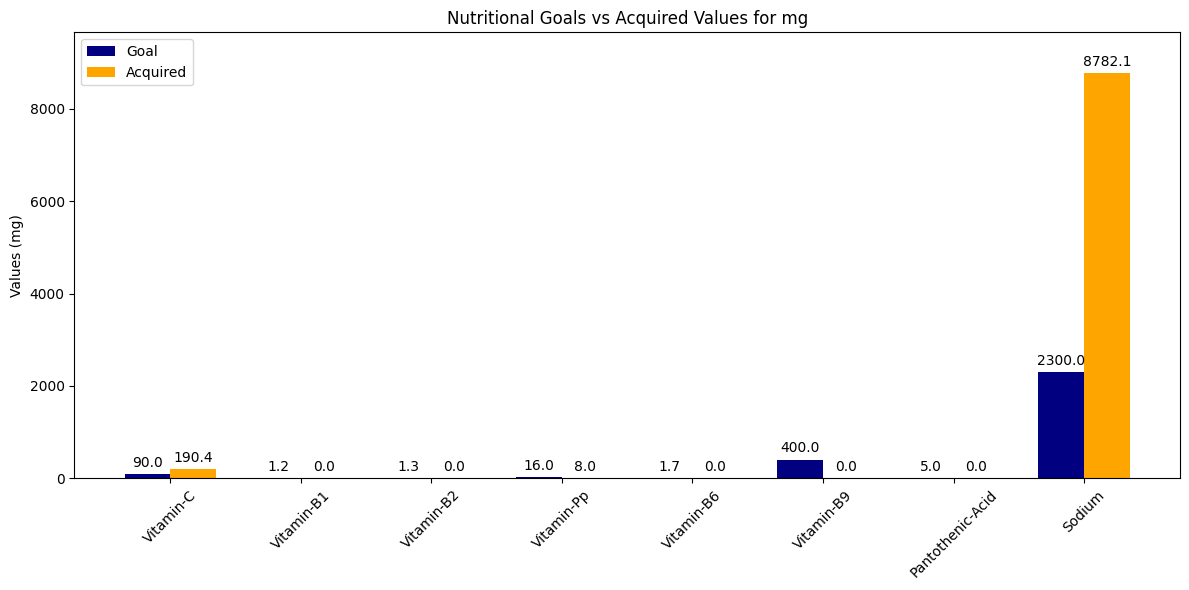

In [ ]:
# Aggregate nutritional information for selected food items
nutrition_totals = aggregate_nutritional_info(food_items, master_df)

# Calculate totals by category for nutritional goals and acquired values
category_totals_goals, category_totals_acquired = calculate_category_totals(nutrition_totals, average_goals)

# Create stacked bar charts to visually compare goals vs. acquired nutrition by category
create_stacked_bar_charts_by_category(category_totals_goals, category_totals_acquired, categories, nutrient_units)

# Create clustered bar charts for each category to compare nutritional goals and acquired values
create_clustered_bar_charts_by_category(nutrition_totals, average_goals, categories, nutrient_units)


**Identify Nutrients Lacking or Exceeding Goals**

Identify nutrients that fall short of or surpass the average nutritional goals. Create two tables (using the PrettyTable library) to lists nutrients that are lacking with recommended food items to meet these goals (Table 1), and to list nutrients that exceed the goals, highlighting potential concerns (2).

In [ ]:
# 7. Analyze and Display Nutrients

def analyze_nutrients(nutrition_totals, average_goals, df, selected_foods):
    """
    Analyze and identify nutrients that are lacking or met/exceeded.

    Args:
        nutrition_totals (dict): Aggregated nutritional values for each feature.
        average_goals (dict): Dietary goals for each nutritional feature.
        df (DataFrame): DataFrame containing nutritional information.
        selected_foods (DataFrame): DataFrame with selected food items.
    Returns:
        tuple: Dictionaries for lacking nutrients, met/exceeded nutrients, top lacking foods, and top met/exceeded foods.
    """
    # Initialize dictionaries to hold nutrient analysis results
    lacking_nutrients = {}  # Dictionary to hold nutrients that are lacking
    met_or_exceeded_nutrients = {}  # Dictionary to hold nutrients that meet or exceed goals
    top_lacking_foods = {}  # Dictionary to hold top 3 food items contributing to each lacking nutrient
    top_met_exceeded_foods = {}  # Dictionary to hold the top food item from input contributing to each met/exceeded nutrient

    # Aggregate contributions from duplicate food items
    selected_foods_aggregated = selected_foods.groupby('product_name_en').sum(numeric_only=True).reset_index()

    # Iterate through each category and its features
    for category, features in categories.items():
        for feature in features:
            # Handle NaN values by checking if feature exists in nutrition_totals and average_goals
            if feature in nutrition_totals and feature in average_goals:
                # Compare the total nutritional value with the average goal
                if pd.notna(nutrition_totals[feature]) and nutrition_totals[feature] < average_goals[feature]:
                    # Calculate the amount by which the nutrient is lacking
                    lacking_nutrients[feature] = (round(nutrition_totals[feature], 2), round(average_goals[feature] - nutrition_totals[feature], 2))

                    # Find the top 3 unique food items in the entire database that have the highest amount of the lacking nutrient
                    df[feature] = pd.to_numeric(df[feature], errors='coerce')  # Convert to numeric, ignore errors
                    top_foods_df = df[df[feature].notna() & df['product_name_en'].notna()].groupby('product_name_en').sum(numeric_only=True).nlargest(10, feature)[[feature]].reset_index()
                    top_foods = []
                    seen_items = set()
                    for idx, row in top_foods_df.iterrows():
                        if row['product_name_en'] not in seen_items and row[feature] > 0:
                            seen_items.add(row['product_name_en'])
                            top_foods.append((row['product_name_en'], row[feature]))
                            if len(top_foods) >= 3:
                                break
                    top_lacking_foods[feature] = top_foods

                elif pd.notna(nutrition_totals[feature]) and nutrition_totals[feature] >= average_goals[feature]:
                    # Calculate the amount by which the nutrient meets or exceeds the goal
                    met_or_exceeded_nutrients[feature] = (round(nutrition_totals[feature], 2), round(nutrition_totals[feature] - average_goals[feature], 2))

                    # Find the top unique food item from the aggregated selected foods that has the highest amount of the met/exceeded nutrient
                    selected_foods_aggregated[feature] = pd.to_numeric(selected_foods_aggregated[feature], errors='coerce')
                    top_food_df = selected_foods_aggregated[selected_foods_aggregated[feature].notna()].nlargest(1, feature)[['product_name_en', feature]]
                    top_food = top_food_df.iloc[0]
                    top_met_exceeded_foods[feature] = (top_food['product_name_en'], top_food[feature])

    return lacking_nutrients, met_or_exceeded_nutrients, top_lacking_foods, top_met_exceeded_foods

In [ ]:
def display_nutrients(lacking_nutrients, met_or_exceeded_nutrients, top_lacking_foods, top_met_exceeded_foods, average_goals):
    """
    Display nutrients in a formatted table with units.

    Args:
        lacking_nutrients (dict): Nutrients that are lacking with their current and lacking amounts.
        met_or_exceeded_nutrients (dict): Nutrients that meet or exceed goals with their current and excess amounts.
        top_lacking_foods (dict): Top 3 food items contributing to each lacking nutrient.
        top_met_exceeded_foods (dict): Top food item contributing to each met/exceeded nutrient.
        average_goals (dict): Dietary goals for each nutritional feature.
    """
    # Display table for lacking nutrients
    if lacking_nutrients:
        table1 = PrettyTable()
        table1.field_names = ["Lacking Nutrient", "Current Amount (units)", "Amount Below Average (units)", "Average (units)", "Top 3 Items to Add to Your Diet"]
        for feature, (current_amount, lacking_amount) in lacking_nutrients.items():
            unit = nutrient_units.get(feature, '')
            average_value = average_goals.get(feature, 0)
            # Format feature names and add rows to the table
            top_foods = top_lacking_foods.get(feature, [])
            top_foods_list = ", ".join([f"{name.capitalize()} ({value:.2f} {unit})" for name, value in top_foods])
            table1.add_row([feature.replace('_value', '').replace('-', ' ').title(), f"{current_amount:.2f} {unit}", f"{lacking_amount:.2f} {unit}", f"{average_value:.2f} {unit}", top_foods_list])
        lacking_table = table1.get_string()  # Get the string representation of the table
    else:
        lacking_table = "No nutrients are lacking."

    # Display table for met or exceeded nutrients
    if met_or_exceeded_nutrients:
        table2 = PrettyTable()
        table2.field_names = ["Met/Exceeded Nutrient", "Current Amount (units)", "Amount Above Average (units)", "Average (units)", "Top Contributing Food Item"]
        for feature, (current_amount, exceeded_amount) in met_or_exceeded_nutrients.items():
            unit = nutrient_units.get(feature, '')
            average_value = average_goals.get(feature, 0)
            # Format feature names and add rows to the table
            top_food = top_met_exceeded_foods.get(feature, ('', 0))
            top_food_str = f"{top_food[0].capitalize()} ({top_food[1]:.2f} {unit})"
            table2.add_row([feature.replace('_value', '').replace('-', ' ').title(), f"{current_amount:.2f} {unit}", f"{exceeded_amount:.2f} {unit}", f"{average_value:.2f} {unit}", top_food_str])
        met_exceeded_table = table2.get_string()  # Get the string representation of the table
    else:
        met_exceeded_table = "No nutrients meet or exceed the average goals."

    # Print both tables
    print(f"{lacking_table}\n\n{met_exceeded_table}\n")

**Example: Nutritional Analysis**

This example demonstrates how to analyze the nutritional content of selected food items, comparing their aggregated nutritional values against predefined average dietary goals. The analysis identifies nutrients that are lacking or exceed the goals and displays the results in a formatted table for easy interpretation.

In [ ]:
# Example usage
food_items = ["Apple", "Pineapple Chunks", "Beef", "Chicken", "Olive Oil"]

# Aggregate nutritional information for the selected food items
nutrition_totals = aggregate_nutritional_info(food_items, master_df)

# Define average nutritional goals for comparison
average_goals = {
    'proteins_value': 56, 'fat_value': 70, 'saturated-fat_value': 20, 'monounsaturated-fat_value': 20,
    'polyunsaturated-fat_value': 10, 'omega-3-fat_value': 1.1, 'omega-6-fat_value': 17, 'trans-fat_value': 0,
    'carbohydrates_value': 260, 'sugars_value': 50, 'added-sugars_value': 25, 'polyols_value': 10, 'fiber_value': 30,
    'energy_value': 2000, 'energy-from-fat_value': 600,
    'vitamin-a_value': 900, 'vitamin-d_value': 15, 'vitamin-c_value': 90, 'vitamin-b1_value': 1.2,
    'vitamin-b2_value': 1.3, 'vitamin-pp_value': 16, 'vitamin-b6_value': 1.3, 'vitamin-b9_value': 400,
    'vitamin-b12_value': 2.4, 'pantothenic-acid_value': 5, 'sodium_value': 2300
}

# Filter the DataFrame to include only the selected food items
selected_foods = master_df[master_df['product_name_en'].str.lower().isin([food.lower() for food in food_items])]

# Analyze nutrients against average goals
lacking_nutrients, met_or_exceeded_nutrients, top_lacking_foods, top_met_exceeded_foods = analyze_nutrients(nutrition_totals, average_goals, master_df, selected_foods)

# Display the analysis results in a formatted table
display_nutrients(lacking_nutrients, met_or_exceeded_nutrients, top_lacking_foods, top_met_exceeded_foods, average_goals)

+------------------+------------------------+------------------------------+-----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Lacking Nutrient | Current Amount (units) | Amount Below Average (units) | Average (units) |                                                                      Top 3 Items to Add to Your Diet                                                                      |
+------------------+------------------------+------------------------------+-----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|   Omega 3 Fat    |         0.00 g         |            1.10 g            |      1.10 g     |                                 Large white egg (263.00 g), N dry 100% rapeseed oil 1 litre (9.60 g), Ca

## Diet Classification

Define several fad diets (Keto, low carb, etc.). Then, allow users/nutrition experts to enter in several major components of their diet. Provide recommendations for which fad diets align with their common nutritional choices. Provide a bar chart to visualize how well their diets align with each of the fad diets.

In [ ]:
# Import and Setup

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

In [ ]:
# Define the feature columns for the clustering
features_columns = ['proteins_value', 'fat_value', 'carbohydrates_value', 'sugars_value', 'fiber_value', 'energy_value']

In [ ]:
def remove_outliers(df, features, threshold=1.5):
    """
    Remove outliers from the specified features of a DataFrame using the Interquartile Range (IQR) method.

    Args:
        df (DataFrame): The input DataFrame containing the data.
        features (list): A list of feature names (columns) from which outliers should be removed.
        threshold (float): The multiplier for the IQR to define the outlier boundaries. Default is 1.5.

    Returns:
        DataFrame: A DataFrame with outliers removed for the specified features.
    """
    for feature in features:
        Q1 = df[feature].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[feature].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1                    # Interquartile Range
        lower_bound = Q1 - threshold * IQR  # Lower bound for outlier
        upper_bound = Q3 + threshold * IQR  # Upper bound for outlier

        # Keep only the rows that are within the bounds
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

    return df

# Remove outliers
master_df_cleaned = remove_outliers(master_df, features_columns)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(master_df_cleaned[features_columns])

In [ ]:
# Perform clustering with 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
master_df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Calculate average values for each cluster
cluster_averages = master_df_cleaned.groupby('cluster')[features_columns].mean()

# Map clusters to diet labels based on average nutrient values
cluster_labels = {
    0: "Low-Calorie Sweet Tooth Diet (Low calories, high sugars)",
    1: "Paleo-Inspired Diet (Moderate protein, low carbohydrates)",
    2: "Zone Diet (Moderate carbs, balanced nutrients)",
    3: "Carb-Loading Diet (High carbohydrates for energy)",
    4: "Fiber-Boost Diet (High fiber, low calories)",
    5: "Atkins Diet (Low carbs, moderate fat)",
    6: "Keto Diet (High protein, high fat)",
    7: "Cleanse Diet (Very low in calories and nutrients)",
    8: "Volumetrics Diet (Low calories, moderate carbs)",
    9: "Mediterranean Diet (Balanced carbohydrates and protein)",
    10: "High-Carb Low-Fat Diet (High carbohydrates, moderate protein)",
    11: "Protein Power Diet (High protein, low calories)"
}

master_df_cleaned['diet_label'] = master_df_cleaned['cluster'].map(cluster_labels)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, master_df_cleaned['cluster'], test_size=0.2, random_state=42)

# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate the model
y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9846142627971416
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2011
           1       0.98      0.98      0.98      1219
           2       0.96      0.95      0.96       884
           3       0.96      0.96      0.96       287
           4       0.98      0.98      0.98       996
           5       0.99      0.99      0.99       560
           6       0.99      0.99      0.99       990
           7       0.99      1.00      0.99      3053
           8       0.98      0.97      0.97       997
           9       0.96      0.95      0.95       502
          10       0.96      0.96      0.96       400
          11       0.99      0.99      0.99      1815

    accuracy                           0.98     13714
   macro avg       0.98      0.98      0.98     13714
weighted avg       0.98      0.98      0.98     13714



In [ ]:
def get_explanation(diet, percentage):
    """
    Generate an explanation for a diet based on its contribution percentage.

    Args:
        diet (str): The name of the diet.
        percentage (float): The percentage contribution of the diet.

    Returns:
        str: A detailed or neutral explanation depending on the percentage.
    """
    if percentage > 20:
        return {
            # Detailed explanations for significant contributions
            "Low-Calorie Sweet Tooth Diet (Low calories, high sugars)": "This diet is low in calories but contains more sugars, typical in desserts or sweet treats.",
            "Paleo-Inspired Diet (Moderate protein, low carbohydrates)": "Rich in protein and low in carbohydrates, similar to Paleo diet principles.",
            "Zone Diet (Moderate carbs, balanced nutrients)": "Provides balanced nutrients with a moderate amount of carbohydrates.",
            "Carb-Loading Diet (High carbohydrates for energy)": "Rich in carbohydrates, ideal for providing sustained energy for physical activities.",
            "Fiber-Boost Diet (High fiber, low calories)": "High in fiber with low calories, promoting digestive health and weight management.",
            "Atkins Diet (Low carbs, moderate fat)": "Low in carbohydrates and moderate in fat, suitable for those following Atkins diet.",
            "Keto Diet (High protein, high fat)": "High in protein and fats, supports ketogenic and low-carb dietary patterns.",
            "Cleanse Diet (Very low in calories and nutrients)": "Extremely low in calories and nutrients, often used for cleansing or fasting.",
            "Volumetrics Diet (Low calories, moderate carbs)": "Low in calories with a moderate amount of carbohydrates, supporting satiety.",
            "Mediterranean Diet (Balanced carbohydrates and protein)": "Balanced in carbohydrates and proteins, inspired by Mediterranean dietary habits.",
            "High-Carb Low-Fat Diet (High carbohydrates, moderate protein)": "High in carbohydrates with moderate protein, providing energy for active lifestyles.",
            "Protein Power Diet (High protein, low calories)": "Rich in protein while low in calories, ideal for maintaining muscle without excess energy."
        }.get(diet, "")
    else:
        return {
            # Neutral explanations for minor contributions
            "Low-Calorie Sweet Tooth Diet (Low calories, high sugars)": "Contributes a small amount of sugars with low calories.",
            "Paleo-Inspired Diet (Moderate protein, low carbohydrates)": "Offers a touch of protein and low carbohydrates, aligning with Paleo principles.",
            "Zone Diet (Moderate carbs, balanced nutrients)": "Provides a modest balance of nutrients with some carbohydrates.",
            "Carb-Loading Diet (High carbohydrates for energy)": "Adds a small amount of carbohydrates for energy.",
            "Fiber-Boost Diet (High fiber, low calories)": "Offers a minor amount of fiber with low calories.",
            "Atkins Diet (Low carbs, moderate fat)": "Adds elements of low carbs and moderate fat, typically in smaller portions.",
            "Keto Diet (High protein, high fat)": "Includes aspects of high protein and fat, usually in small amounts.",
            "Cleanse Diet (Very low in calories and nutrients)": "Minimal in calories and nutrients, often for supplementary purposes.",
            "Volumetrics Diet (Low calories, moderate carbs)": "Adds low-calorie, moderate-carb components to meals.",
            "Mediterranean Diet (Balanced carbohydrates and protein)": "Contributes balanced carbohydrates and proteins in a complementary fashion.",
            "High-Carb Low-Fat Diet (High carbohydrates, moderate protein)": "Enhances diet with additional carbohydrates and some protein.",
            "Protein Power Diet (High protein, low calories)": "Augments meals with protein-rich, low-calorie options."
        }.get(diet, "Plays a minor role with limited impact.")

In [ ]:
def print_top_fits(top_3_fits):
    """
    Print the top 3 diet fits and their explanations.

    Args:
        top_3_fits (list): A list of tuples containing diet names and their fit percentages.

    Returns:
        None
    """
    print("Top 3 Diet Fits and Explanations:")
    for diet, percentage in top_3_fits:
        print(f"{diet}: {percentage}%")
        explanation = get_explanation(diet, percentage)
        print(f"Explanation: {explanation}\n")

In [ ]:
def predict_diet_for_food_combination(food_names, clf, scaler, features_columns, cluster_labels):
    """
    Predict the diet cluster for a combination of food items and display results.

    Args:
        food_names (list): List of food item names.
        clf (Classifier): The trained classifier model.
        scaler (Scaler): The scaler for feature normalization.
        features_columns (list): List of feature column names.
        cluster_labels (dict): Mapping of cluster indices to diet labels.

    Returns:
        None
    """
    # Initialize a dictionary to store the total aggregated features
    aggregated_features = {feature: 0 for feature in features_columns}

    # Iterate over each unique food item
    for food_name in food_names:
        # Extract all entries for the food item
        food_entries = master_df[master_df['product_name_en'].str.lower() == food_name.lower()]

        # Check if any entries are found
        if not food_entries.empty:
            # Calculate the average nutritional values for the current food item
            food_avg = food_entries[features_columns].mean()

            # Add these averages to the aggregated features
            for feature in features_columns:
                aggregated_features[feature] += food_avg[feature]

    # Convert aggregated features to DataFrame and scale
    features_df = pd.DataFrame([aggregated_features], columns=features_columns)
    features_scaled = scaler.transform(features_df)

    # Predict the cluster and probabilities
    predicted_cluster = clf.predict(features_scaled)[0]
    proba = clf.predict_proba(features_scaled)[0]
    fit_percentages = {cluster_labels[i]: round(prob * 100, 2) for i, prob in enumerate(proba)}

    # Get top 3 diet fits
    top_3_fits = sorted(fit_percentages.items(), key=lambda x: x[1], reverse=True)[:3]

    # Display the bar chart for fit percentages
    plt.figure(figsize=(12, 8))  # Increase the figure size for better readability
    plt.bar(fit_percentages.keys(), fit_percentages.values(), color='skyblue')
    plt.ylabel('Fit Percentage')
    plt.title(f"Diet Fit Percentages for {', '.join(food_names)}")
    plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()

    # Print results
    print(f"\n{'#' * 40}")
    print(f"Food Items: {', '.join(food_names)}")
    print(f"Predicted Diet: {cluster_labels[predicted_cluster]}")
    print(f"Fit Percentages: {fit_percentages}")
    print(f"{'#' * 40}\n")

    # Call the function to print top 3 diet fits and explanations
    print_top_fits(top_3_fits)

    # Display nutritional facts
    table = PrettyTable()
    table.field_names = ["Nutritional Feature", "Total Value"]
    for feature, value in aggregated_features.items():
        unit = nutrient_units.get(feature, '')
        table.add_row([feature.replace('_value', '').replace('-', ' ').title(), f"{round(value, 2)} {unit}"])


**Examples: Diet Cluster Prediction**

These examples illustrate how to predict the diet clusters for various combinations of food items using a trained classifier model. Each combination of foods is analyzed to determine its alignment with predefined diet clusters, providing insights into the nutritional profile and dietary fit of the selected items.

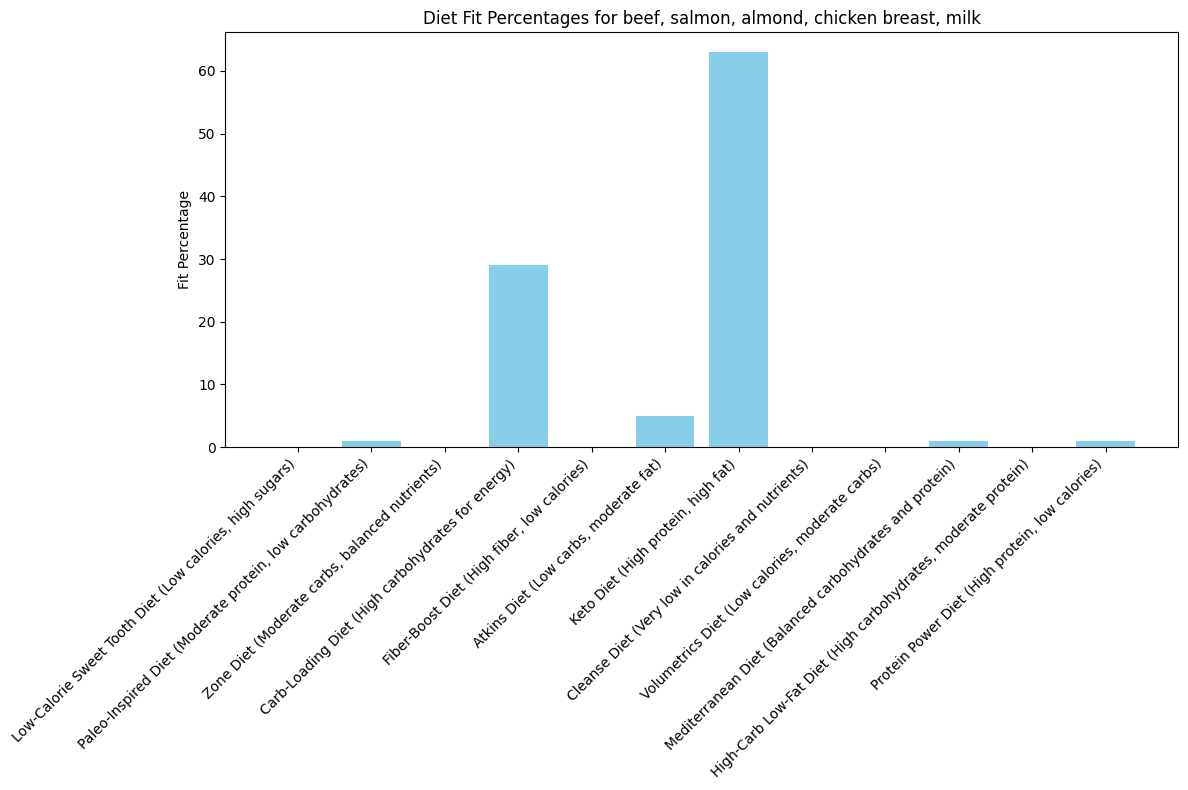


########################################
Food Items: beef, salmon, almond, chicken breast, milk
Predicted Diet: Keto Diet (High protein, high fat)
Fit Percentages: {'Low-Calorie Sweet Tooth Diet (Low calories, high sugars)': 0.0, 'Paleo-Inspired Diet (Moderate protein, low carbohydrates)': 1.0, 'Zone Diet (Moderate carbs, balanced nutrients)': 0.0, 'Carb-Loading Diet (High carbohydrates for energy)': 29.0, 'Fiber-Boost Diet (High fiber, low calories)': 0.0, 'Atkins Diet (Low carbs, moderate fat)': 5.0, 'Keto Diet (High protein, high fat)': 63.0, 'Cleanse Diet (Very low in calories and nutrients)': 0.0, 'Volumetrics Diet (Low calories, moderate carbs)': 0.0, 'Mediterranean Diet (Balanced carbohydrates and protein)': 1.0, 'High-Carb Low-Fat Diet (High carbohydrates, moderate protein)': 0.0, 'Protein Power Diet (High protein, low calories)': 1.0}
########################################

Top 3 Diet Fits and Explanations:
Keto Diet (High protein, high fat): 63.0%
Explanation: High in prot

In [ ]:
# Example usage
predict_diet_for_food_combination(["beef", "salmon", "almond", "chicken breast", "milk"], clf, scaler, features_columns, cluster_labels)

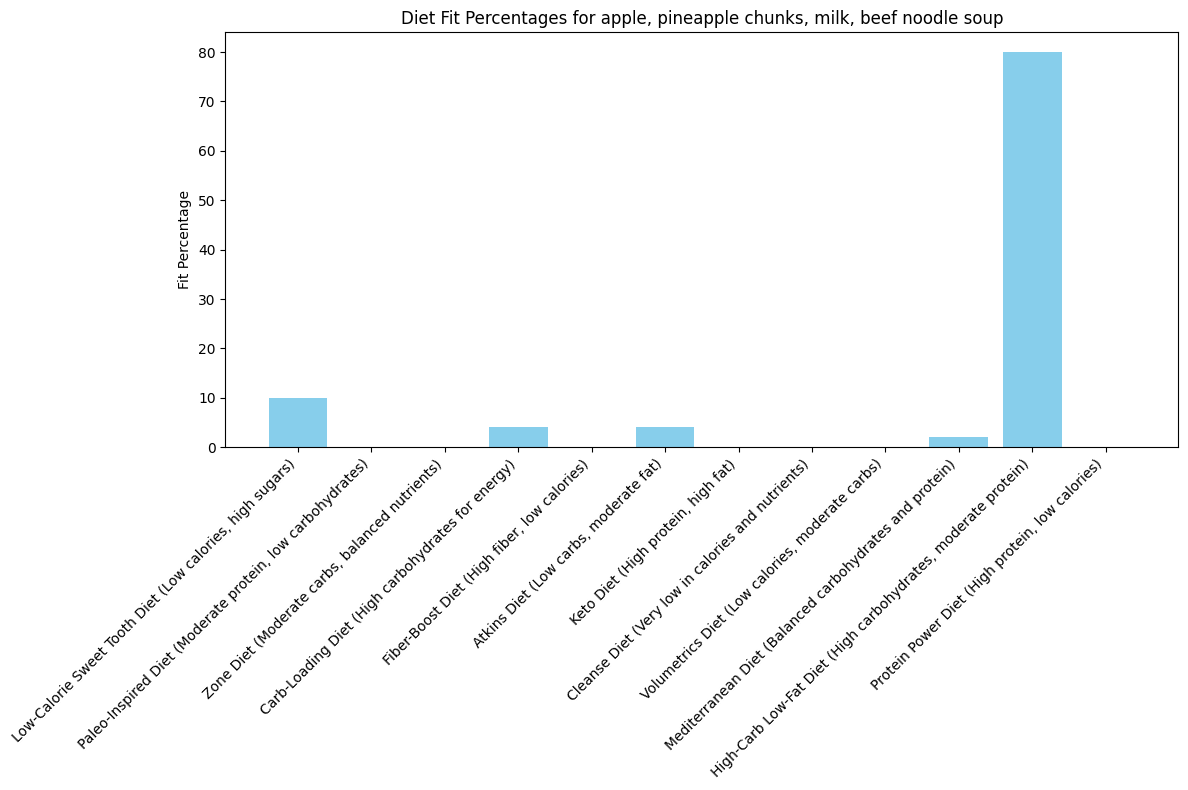


########################################
Food Items: apple, pineapple chunks, milk, beef noodle soup
Predicted Diet: High-Carb Low-Fat Diet (High carbohydrates, moderate protein)
Fit Percentages: {'Low-Calorie Sweet Tooth Diet (Low calories, high sugars)': 10.0, 'Paleo-Inspired Diet (Moderate protein, low carbohydrates)': 0.0, 'Zone Diet (Moderate carbs, balanced nutrients)': 0.0, 'Carb-Loading Diet (High carbohydrates for energy)': 4.0, 'Fiber-Boost Diet (High fiber, low calories)': 0.0, 'Atkins Diet (Low carbs, moderate fat)': 4.0, 'Keto Diet (High protein, high fat)': 0.0, 'Cleanse Diet (Very low in calories and nutrients)': 0.0, 'Volumetrics Diet (Low calories, moderate carbs)': 0.0, 'Mediterranean Diet (Balanced carbohydrates and protein)': 2.0, 'High-Carb Low-Fat Diet (High carbohydrates, moderate protein)': 80.0, 'Protein Power Diet (High protein, low calories)': 0.0}
########################################

Top 3 Diet Fits and Explanations:
High-Carb Low-Fat Diet (High carboh

In [ ]:
# Example usage
predict_diet_for_food_combination(["apple", "pineapple chunks", "milk", "beef noodle soup"], clf, scaler, features_columns, cluster_labels)

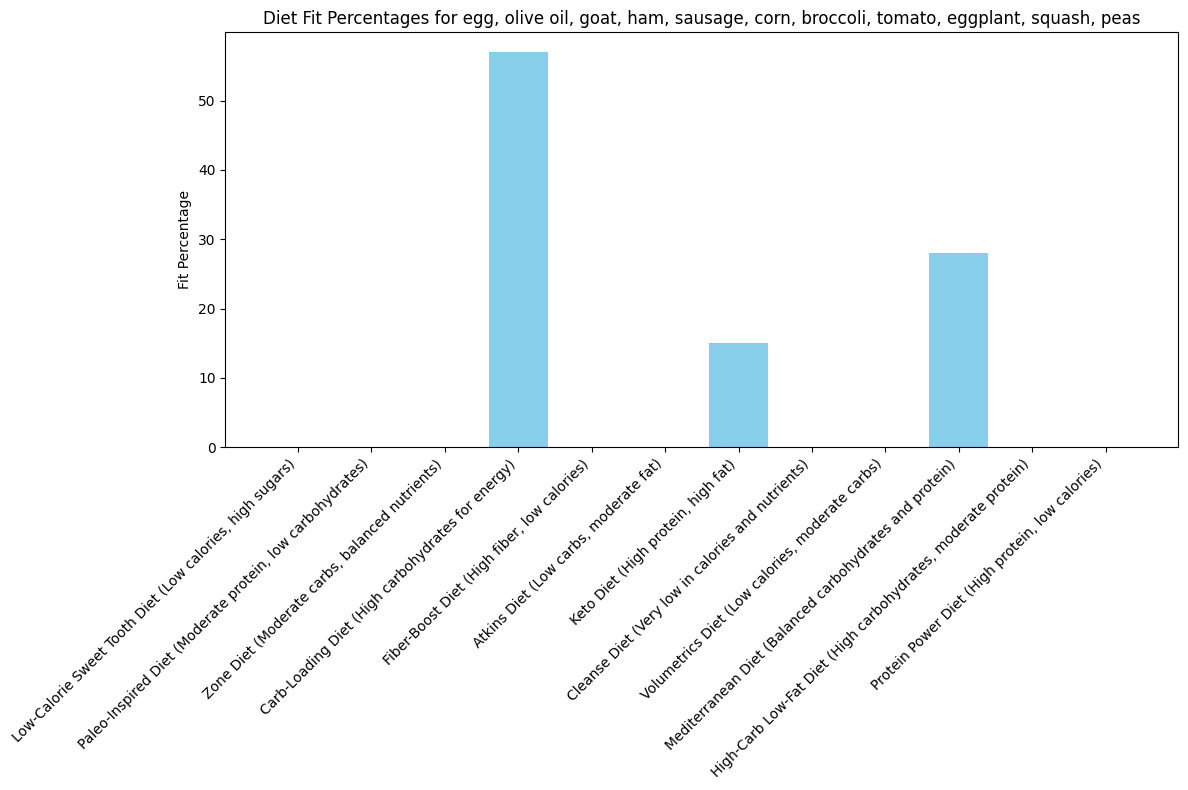


########################################
Food Items: egg, olive oil, goat, ham, sausage, corn, broccoli, tomato, eggplant, squash, peas
Predicted Diet: Carb-Loading Diet (High carbohydrates for energy)
Fit Percentages: {'Low-Calorie Sweet Tooth Diet (Low calories, high sugars)': 0.0, 'Paleo-Inspired Diet (Moderate protein, low carbohydrates)': 0.0, 'Zone Diet (Moderate carbs, balanced nutrients)': 0.0, 'Carb-Loading Diet (High carbohydrates for energy)': 57.0, 'Fiber-Boost Diet (High fiber, low calories)': 0.0, 'Atkins Diet (Low carbs, moderate fat)': 0.0, 'Keto Diet (High protein, high fat)': 15.0, 'Cleanse Diet (Very low in calories and nutrients)': 0.0, 'Volumetrics Diet (Low calories, moderate carbs)': 0.0, 'Mediterranean Diet (Balanced carbohydrates and protein)': 28.0, 'High-Carb Low-Fat Diet (High carbohydrates, moderate protein)': 0.0, 'Protein Power Diet (High protein, low calories)': 0.0}
########################################

Top 3 Diet Fits and Explanations:
Carb-Loadin

In [ ]:
# Example usage
predict_diet_for_food_combination(["egg", "olive oil", "goat", "ham", "sausage", "corn", "broccoli", "tomato", "eggplant", "squash", "peas"], clf, scaler, features_columns, cluster_labels)

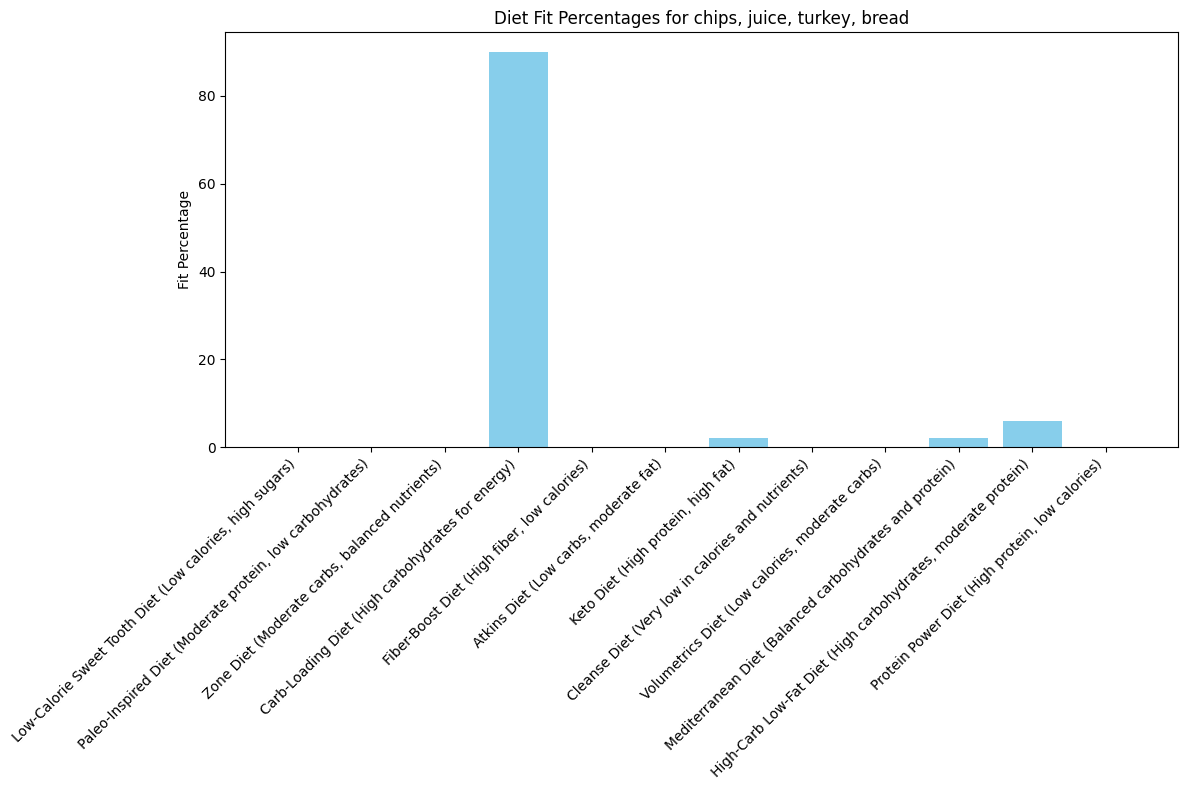


########################################
Food Items: chips, juice, turkey, bread
Predicted Diet: Carb-Loading Diet (High carbohydrates for energy)
Fit Percentages: {'Low-Calorie Sweet Tooth Diet (Low calories, high sugars)': 0.0, 'Paleo-Inspired Diet (Moderate protein, low carbohydrates)': 0.0, 'Zone Diet (Moderate carbs, balanced nutrients)': 0.0, 'Carb-Loading Diet (High carbohydrates for energy)': 90.0, 'Fiber-Boost Diet (High fiber, low calories)': 0.0, 'Atkins Diet (Low carbs, moderate fat)': 0.0, 'Keto Diet (High protein, high fat)': 2.0, 'Cleanse Diet (Very low in calories and nutrients)': 0.0, 'Volumetrics Diet (Low calories, moderate carbs)': 0.0, 'Mediterranean Diet (Balanced carbohydrates and protein)': 2.0, 'High-Carb Low-Fat Diet (High carbohydrates, moderate protein)': 6.0, 'Protein Power Diet (High protein, low calories)': 0.0}
########################################

Top 3 Diet Fits and Explanations:
Carb-Loading Diet (High carbohydrates for energy): 90.0%
Explanation

In [ ]:
# Example usage
predict_diet_for_food_combination(["chips", "juice", "turkey", "bread"], clf, scaler, features_columns, cluster_labels)